In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from miss_inducer import induce_mar, induce_mcar
from data_load import load_raw_data
from conf_vars import time_vars, drop_cols
import numpy as np
import pandas as pd
import math
import json
from sklearn.metrics import mean_absolute_error
from imp_methods import impute_ffil, impute_median
from pandas.core.frame import DataFrame

vars = ["bp", "hr", "rr", "spo2", "tmp", "age", "seq_len"]
time_vars = ["bp", "hr", "rr", "spo2", "tmp"]
static_columns = ["case_id", "time_index"]

In [2]:
from desc_stats import plot_error_bars

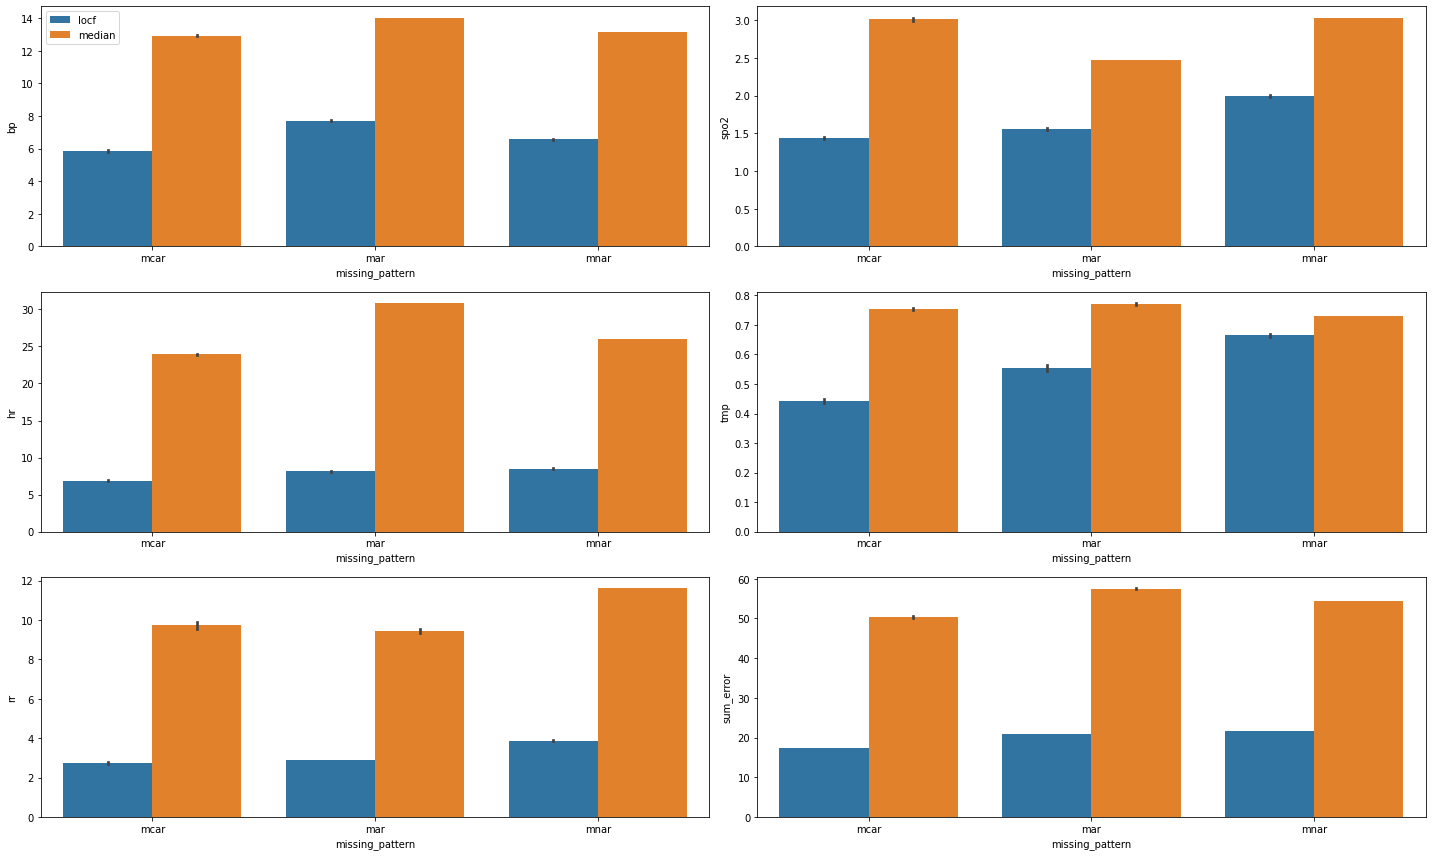

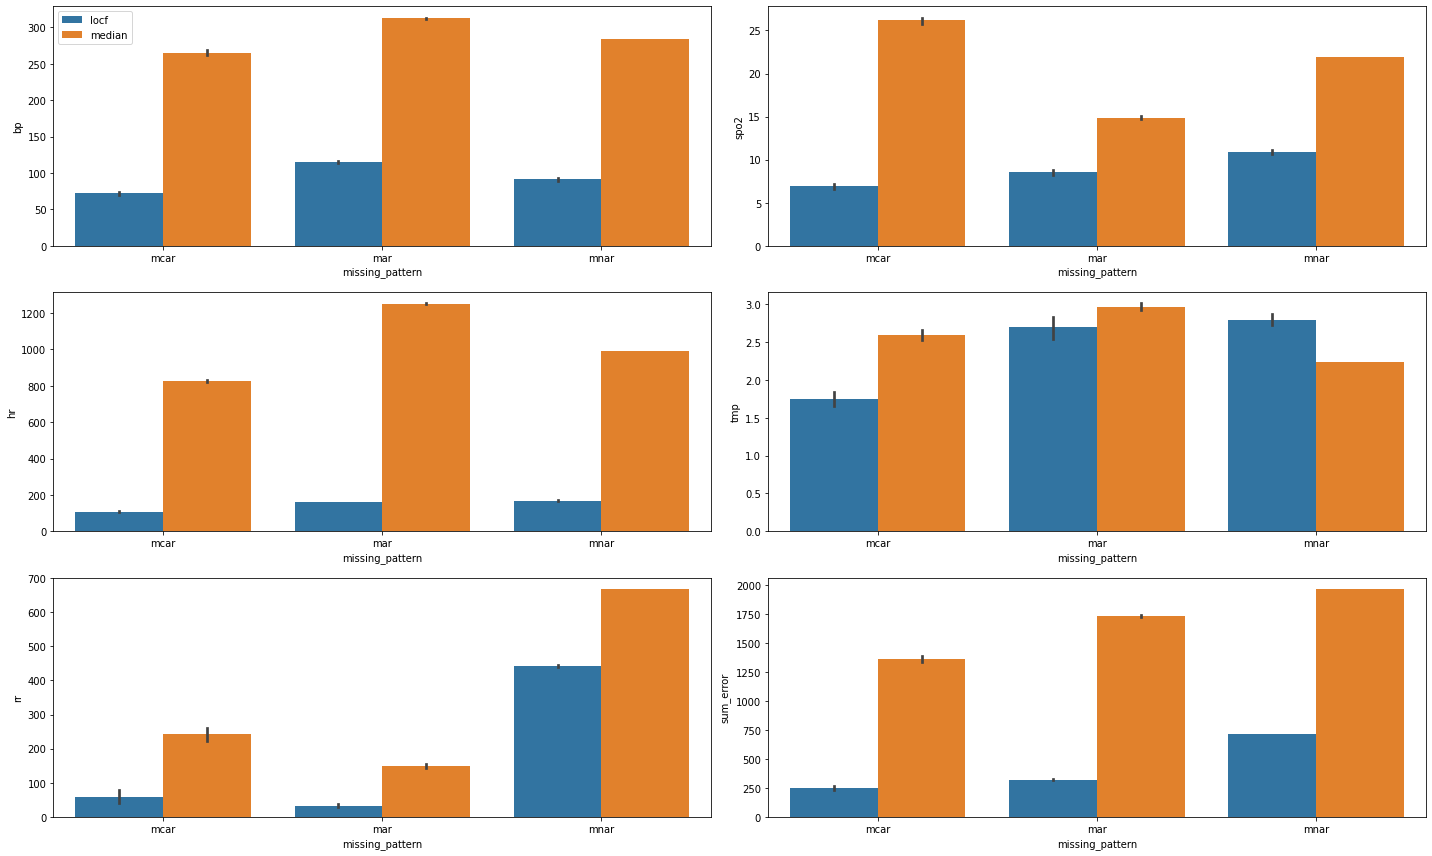

In [3]:
plot_error_bars()

In [ ]:
path_res_dict = "./res_ci_imp.json"

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return np.round(m, 3), np.round(m-h, 3), np.round(m+h, 3)

In [ ]:
df = pd.read_csv("./res_ci_raw_data.csv", index_col=0)

In [ ]:
df_peng = sns.load_dataset("penguins")

In [ ]:
df_peng.head()

In [ ]:
df.head()

In [ ]:
sns.barplot(data=df[df.metric == "mse"], x="missing_pattern", y="bp", hue="imputation_method", ax=axs[0][0])

In [ ]:
df

In [ ]:
from conf_vars import time_vars
time_vars = time_vars + ["sum_error"]

rows = (math.ceil(len(time_vars)/2))
f, axs = plt.subplots((rows), 2, figsize=(20, rows*4))
df = df[df.metric == "mae"]
for i, v in enumerate(time_vars):
    sns.barplot(data=df, x="missing_pattern", y=v, hue="imputation_method", ax=axs[i%rows][int(i/rows)])
    if i == 0:
        axs[0][0].legend()
    else:
        axs[i%3][int(i/rows)].get_legend().remove()
f.tight_layout()
f.savefig("./error_bars.png")

In [ ]:
f

In [ ]:
df = df.assign(sum_error = df[time_vars].sum(axis=1))

In [ ]:
df.groupby(["missing_pattern", "imputation_method", "metric"])["sum_error"]\
    .apply(lambda x: mean_confidence_interval(x)).reset_index()

In [ ]:
from desc_stats import calc_ci_over_columns

In [ ]:
calc_ci_over_columns(df=pd.read_csv("./res_ci_raw_data.csv", index_col=0), 
                    val_cols=time_vars, 
                    gr_cols=["missing_pattern", "imputation_method", "metric"])

In [ ]:
mean_confidence_interval(data = [3,4,5,5,3,3,3,2,2,4,5,6,6,3,2,2,4])

In [ ]:
with open(path_res_dict, "r") as f:
    res_dict = json.load(f)

In [ ]:
df_res = pd.DataFrame()


In [ ]:
len(res_dict['0']["metrics"]["mae"])

In [ ]:
ci_n = len(res_dict['0']["metrics"]["mae"])

In [ ]:
df = pd.concat([pd.DataFrame(res_dict['0']["metrics"]["mae"][x]).set_index("variable").T for x in range(0, ci_n)])
df["missing_pattern"] = res_dict["0"]["missing_pattern"]

In [ ]:
df[["e", "f"]] = 4, 5

In [ ]:
df = pd.read_csv("./res_ci_df.csv", index_col=0)
dfs = [df.groupby(["missing_pattern", "imputation_method", "metric"])[var]\
    .apply(lambda x: mean_confidence_interval(x)).reset_index() for var in time_vars]

In [ ]:
from functools import reduce
reduce(lambda df1, df2: df1.merge(df2, on=["missing_pattern", "imputation_method", "metric"] ,how="inner"), dfs)

In [ ]:
res_dict["0"]["missing_pattern"]

In [ ]:
res_dict['0']["metrics"]["mae"][0]

In [ ]:
mean_confidence_interval([res_dict['0']["metrics"]["mae"][x]['error'][0] for x in range(0, ci_n)])

In [ ]:
for metric in res_dict['0']["metrics"].keys():
    res_dict['0']["metrics"][metric]

In [ ]:
pd.DataFrame(res_dict['0']["metrics"]["mae"])

In [ ]:
def plot_miss_patterns_values(df_dict, name="miss_pattern", is_in_range = True):
    rows = (math.ceil(len(time_vars)/2))
    f, axs = plt.subplots((rows), 2, figsize=(15, rows*4))
    for i, v in enumerate(time_vars):
        for k in df_dict.keys():
            print(k)
            sns.histplot(df_dict[k]["data"][v], ax=axs[i%3][int(i/rows)], alpha=0.5, color=df_dict[k]["color"], kde=True, label=k)
        axs[i%3][int(i/rows)].set_title(v)
        if i == 0:
            axs[i%3][int(i/rows)].legend()
    f.tight_layout()
    return f

In [ ]:
df = load_raw_data()
mcar = pd.read_csv("/home/giesan/data/mcar_val.csv", index_col=0)
mar = pd.read_csv("/home/giesan/data/mar_val.csv", index_col=0)
mnar = pd.read_csv("/home/giesan/data/mnar_val.csv")

In [ ]:
len(df)

In [ ]:
df.hr.describe()

In [ ]:
def impute_ffil(df  = None, group_cols = ["case_id"], time_vars = time_vars):
    stats = df.describe().reset_index() # TODO check on these two methods and why they yield same results
    medi_fill = stats[stats["index"] == "50%"][time_vars].iloc[0]
    # apply forward fill, impute values with median and remaining with 0 in edge cases
    df[time_vars] = df.groupby(group_cols).\
        transform(lambda x: x.ffill())[time_vars].fillna(medi_fill).fillna(0)
    return df

def impute_median(df  = None, time_vars = time_vars):
    stats = df.describe().reset_index()
    medi_fill = stats[stats["index"] == "50%"][time_vars].iloc[0]
    # apply forward fill, impute values with median and remaining with 0 in edge cases
    df[time_vars] = df[time_vars].fillna(medi_fill).fillna(0)
    return df

In [ ]:
mar.hr.describe()

In [ ]:
import sklearn.metrics

In [ ]:
def calc_error(df_gt: DataFrame = None, df_imp: DataFrame = None, time_vars: list = [], metric = None, df_miss = None):
    '''
    Calculates the error per variable between actual and imputed values
            Parameters:
                    df_gt (DataFrame): Ground thruth dataframe with real values
                    df_imp (DataFrame): Imputed dataframe 
                    time_vars (list): Column names for imp variables
                    metric (metric): (Sklearn) Metric to calculate the error
                    df_miss (DataFrame): df with miss pattenr, if specified just include imputed vales

            Returns:
                    df (DataFrame): Df with error per variable
    '''
    if df_miss is not None:
        error = [metric(df_gt.iloc[df_miss[df_miss[v].isna()].index][v], 
                        df_imp.iloc[df_miss[df_miss[v].isna()].index][v]) 
                        for v in time_vars]
    else:
        error = [metric(df_gt[v], df_imp[v]) for v in time_vars]
    return pd.DataFrame({"variable": time_vars, "error": error})
    

In [ ]:
mar = pd.read_csv("/home/giesan/data/mar_val.csv", index_col=0)


In [ ]:
mar

In [ ]:
df.iloc[mar[mar["rr"].isna()].index]

In [ ]:
pd.read_csv("/home/giesan/data/mar_val.csv", index_col=0)

In [ ]:
mar = pd.read_csv("/home/giesan/data/mar_val.csv", index_col=0)
df_ffill = impute_median(df_in = mar, time_vars=time_vars)
res_1 = calc_error(df_gt=df, df_imp=df_ffill, time_vars=time_vars, metric=mean_absolute_error, 
#        df_miss=pd.read_csv("/home/giesan/data/mar_val.csv", index_col=0))


In [ ]:
df_ffill

In [ ]:
mar = pd.read_csv("/home/giesan/data/mar_val.csv", index_col=0)
df_median = impute_median(df = mar, time_vars=time_vars)
res_2 = calc_error(df_gt=df, df_imp=df_median, time_vars=time_vars, metric=mean_absolute_error)

In [ ]:
res_1

In [ ]:
res_2

In [ ]:
df_ffill.bp.describe()

In [ ]:
mean_absolute_error(df[["bp", "rr"]], df_ffill[["bp", "rr"]])

In [ ]:
mean_absolute_error(df.bp, df_median.bp)

In [ ]:
valid_ranges = {
    "bp": [10, 250],
    "rr": [3, 100],
    "hr": [10, 250],
    "spo2": [30, 100],
    "tmp": [20, 45]
}

In [ ]:
df_clean = df # TODO cleaning
for key in valid_ranges.keys():
    df = df[(df[key] >= valid_ranges[key][0]) & (df[key] <= valid_ranges[key][1])]

In [ ]:
from desc_stats import get_desc_stats, plot_distr

In [ ]:
get_desc_stats(df)

In [ ]:
plot_distr(df, "distr_values_clean")

In [ ]:
from functools import reduce
def induce_mar(df = None, cond_var = "age", s_range = [0.1, 0.9]):
    df_gr = df.groupby("case_id")[cond_var].median().reset_index()
    # asssign missing rate to cases normalized with norm distr added
    miss_fractions =  df_gr[cond_var]
    # normalization between [s_min : s_max]
    s_min, s_max = s_range[0], s_range[1]
    miss_fractions = (miss_fractions - min(miss_fractions))/ \
        (max(miss_fractions) - min(miss_fractions)) * (s_max - s_min) + s_min
    df_gr = df_gr.assign(miss_fraction = miss_fractions)
    # merge missing rates to actual values 
    df = df.merge(df_gr[["case_id", "miss_fraction"]], on=["case_id"])
    # going through variables and cases on conditioning on dependent variable
    df_vars = []
    for time_v in time_vars:
        dfs_cases = []
        for i, row in df_gr.iterrows():
            miss_fraction = row["miss_fraction"]
            dfs_cases.append(df[(df.case_id == row["case_id"])] \
                [["case_id","timestamp","seq_no","age", time_v]].sample(frac = 1 - miss_fraction))
        df_vars.append(pd.concat(dfs_cases))
    # outerjoining results containing missingness per variable to one dataframe
    df_join = reduce(lambda df1, df2: df1.merge(df2, on=["case_id", "timestamp", "seq_no", "age"], how = "outer"), df_vars).drop_duplicates()
    return df[["case_id","timestamp", "seq_no", "age"]].merge(df_join, on=["case_id", "timestamp", "seq_no", "age"], how = "left")


In [ ]:
cond_var = "age"
df_gr = df.groupby("case_id")[cond_var].median().reset_index()

In [ ]:
miss_fractions = df_gr.age

In [ ]:

miss_fractions = (miss_fractions - min(miss_fractions))/ \
        (max(miss_fractions) - min(miss_fractions)) * (0.9 - 0.1) + 0.1

In [ ]:
df_gr["fr"] = miss_fractions

In [ ]:
df_gr

In [ ]:
def induce_mar(df = None, cond_var = "age", s_range = [0.1, 0.9]):
    df_gr = df.groupby("case_id")[cond_var].median().reset_index()
    mean = df_gr[cond_var].describe()["mean"]
    std = df_gr[cond_var].describe()["std"]
    # add normal distribution to age 
    s = np.random.normal(mean, std, len(df_gr))
    # asssign missing rate to cases normalized with norm distr added
    miss_fractions =  df_gr[cond_var] + s
    # normalization between [s_min : s_max]
    s_min, s_max = s_range[0], s_range[1]
    miss_fractions = (miss_fractions - min(miss_fractions))/ \
        (max(miss_fractions) - min(miss_fractions)) * (s_max - s_min) + s_min
    df_gr = df_gr.assign(miss_fraction = miss_fractions)
    # merge missing rates to actual values 
    df = df.merge(df_gr[["case_id", "miss_fraction"]], on=["case_id"])
    # going through variables and cases on conditioning on dependent variable
    df_vars = []
    for time_v in time_vars:
        dfs_cases = []
        for i, row in df_gr.iterrows():
            miss_fraction = row["miss_fraction"]
            dfs_cases.append(df[(df.case_id == row["case_id"])] \
                [["case_id","timestamp","seq_no","age", time_v]].sample(frac = 1 - miss_fraction))
        df_vars.append(pd.concat(dfs_cases))
    # outerjoining results containing missingness per variable to one dataframe
    df_join = reduce(lambda df1, df2: df1.merge(df2, on=["case_id", "timestamp", "seq_no", "age"], how = "outer"), df_vars).drop_duplicates()
    return df[["case_id","timestamp", "seq_no", "age"]].merge(df_join, on=["case_id", "timestamp", "seq_no", "age"], how = "left")



In [ ]:
len(df["bp"].dropna())

In [ ]:
len(df_mcar["bp"].dropna())

In [ ]:
df["bp"].plot.hist(bins=100, alpha=0.5)

In [ ]:
from conf_vars import time_vars

In [ ]:
def count_nas(df, group = ["case_id", "age"]):
    all_nan_counts = df.groupby(group, dropna=True).count().reset_index()
    all_nan_counts[time_vars] = all_nan_counts[time_vars].sub(all_nan_counts.timestamp, axis=0).abs()
    return all_nan_counts


In [ ]:
df_mar

In [ ]:
#nas_df_mar = count_nas(df_mar)
nas_df_mcar = count_nas(df_mcar)

In [ ]:
nas_df_mcar["bp"]

In [ ]:
df["bp"].plot.hist(bins=100, alpha=0.5)

In [ ]:
nas_df_mar["bp"].plot.hist(bins=100, alpha=0.5)

In [ ]:
nas_df_mar[["bp", "age"]].plot()

In [ ]:
nas_df_mar["bp"].hist()

In [ ]:
nas_df_mcar["bp"].hist()

In [ ]:
# sequence number is not missing 
all_nan_counts = df_mcar.groupby("case_id", dropna=True).count().reset_index()

In [ ]:
all_nan_counts

In [ ]:
from desc_stats import get_desc_stats, plot_distr

In [ ]:
df.columns

In [ ]:
def plot_distr(df, name = "distr_values"):
    # get counts
    no_rows = len(df)
    no_cases = len(df.case_id.drop_duplicates())
    no_seq = len(df[["case_id", "seq_no"]].drop_duplicates())
    # define drop cols
    drop = [x for x in drop_cols if x in list(df.columns)]
    # plot distributions
    f, axs = plt.subplots(len(df.drop(columns=drop).columns), 1, figsize= (10, 35))
    f.suptitle("Distribution for {} datapoints with {} sequences \n for {} cases with EHR sampled in 2h intervals ".format(no_rows, no_seq, no_cases))
    # go though variables and plot on axis
    for i, v in enumerate(sorted(list(df.drop(columns=drop).columns))):
        df_plot = df[v]
        if v == "age":
            df_plot = df.groupby("case_id")["age"].median().reset_index()[v]
        if v == "seq_len":
            df_plot = df.groupby(["case_id", "seq_no"])["seq_len"].median().reset_index()[v]
        sns.histplot(df_plot, kde=True, ax=axs[i], stat="density")
        axs[i].set_title("n = {} ".format(len(df_plot)))
    # store plots
    f.tight_layout(pad=4)
    f.savefig("./{}.png".format(name))

In [ ]:
plot_distr(df_mcar, name="distr_values_mcar")

In [ ]:
all_nan_counts["age"] - all_nan_counts[["bp","hr", "rr", "spo2", "tmp"]]

In [ ]:
df_mcar.groupby("case_id", dropna=False).count()

In [ ]:
df = load_raw_data()
d = induce_mar(df=df)

In [ ]:
df_stats = d.describe().reset_index()
s = df_stats[df_stats["index"] == "50%"][["bp", "hr", "rr", "spo2", "tmp"]].iloc[0]

In [ ]:
df_stats.index.values

In [ ]:
import statsmodels.imputation.mice as mc

In [ ]:
import statsmodels.regression.linear_model as reg

In [ ]:
d

In [ ]:
d[time_vars].reset_index()

In [ ]:
mcdata = mc.MICEData(d[time_vars].reset_index())

In [ ]:
fml = 'hr ~ bp + rr + spo2 + tmp'

In [ ]:
mice = mc.MICE(fml, reg.OLS, mcdata)

In [ ]:
mcdata.data

In [ ]:
results = mice.fit(10, 10)

# TOD nburn in phase etc

In [ ]:
print(results.summary())

In [ ]:
# data update.... 

In [ ]:
mice.data.data

In [ ]:
def impute_ffil(df  = None):
    stats = df.describe().reset_index()
    medi_fill = stats[stats["index"] == "50%"][time_vars].iloc[0]
    # apply forward fill, impute values with median and rest with 0 in edge cases
    df[time_vars] = df.groupby(["case_id","seq_no","age"]).\
        transform(lambda x: x.ffill())[time_vars].\
            fillna(s).fillna(0)
    return df

In [ ]:
impute_ffil(d)

In [ ]:
# apply forward fill imputation method 
d.groupby(["case_id","seq_no","age"]).transform(lambda x: x.ffill())[time_vars].fillna(s)

In [ ]:
df = load_raw_data()
cond_var = "age"
df_gr = df.groupby("case_id")[cond_var].median().reset_index()
mean = df_gr[cond_var].describe()["mean"]
std = df_gr[cond_var].describe()["std"]
# add normal distribution to age 
s = np.random.normal(mean, std, len(df_gr))
# asssign missing rate to cases normalized with norm distr added
miss_fractions =  df_gr[cond_var] + s
# normalization between [s_min : s_max]
s_min, s_max = 0.1, 0.9
miss_fractions = (miss_fractions - min(miss_fractions))/ \
    (max(miss_fractions) - min(miss_fractions)) * (s_max - s_min) + s_min
df_gr = df_gr.assign(miss_fraction = miss_fractions)
# merge missing rates to actual values 
df = df.merge(df_gr[["case_id", "miss_fraction"]], on=["case_id"])
# going through variables and cases on conditioning on dependent variable
df_vars = []
for time_v in time_vars:
    dfs_cases = []
    for i, row in df_gr.iterrows():
        miss_fraction = row["miss_fraction"]
        dfs_cases.append(df[(df.case_id == row["case_id"])] \
            [["case_id","timestamp","seq_no","age", time_v]].sample(frac = 1 - miss_fraction))
    df_vars.append(pd.concat(dfs_cases))
# outerjoining results containing missingness per variable to one dataframe
#df_join = reduce(lambda df1, df2: df1.merge(df2, on=["case_id", "timestamp", "seq_no", "age"], how = "outer"), df_vars).drop_duplicates()
#return df[["case_id","timestamp", "seq_no", "age"]].merge(df_join, on=["case_id", "timestamp", "seq_no", "age"], how = "left")

In [ ]:
df_vars[0:3]

In [ ]:
from functools import reduce
reduce(lambda df1, df2: df1.merge(df2, on=["case_id", "timestamp", "seq_no", "age"], how = "outer"), df_vars)

In [ ]:
len(df)

In [ ]:
len(pd.read_csv("/home/giesan/data/mi_icu_full_data_07_10_22.csv", header= None, names=col_names, index_col=0).reset_index())

In [ ]:
df_age = df.groupby("case_id")["age"].median().reset_index()

In [ ]:
mean = df_age["age"].describe()["mean"]
std = df_age["age"].describe()["std"]

In [ ]:
import numpy as np
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mean, std, len(df_age))

In [ ]:
sns.histplot(s)

In [ ]:
len(s)

In [ ]:
df_age

In [ ]:
sns.histplot(df_age["age"] + s)

In [ ]:
values = df_age["age"] + s

In [ ]:
import numpy as np
cond_var = "age"
df_gr = df.groupby("case_id")[cond_var].median().reset_index()
mean = df_gr[cond_var].describe()["mean"]
std = df_gr[cond_var].describe()["std"]
# add normal distribution to age 
s = np.random.normal(mean, std, len(df_gr))
# asssign missing rate to cases
miss_fractions =  df_gr[cond_var] + s
miss_fractions = (miss_fractions - min(miss_fractions))/ (max(miss_fractions) - min(miss_fractions))
df_gr = df_gr.assign(miss_fraction = miss_fractions)

In [ ]:
df.head(9)

In [ ]:
from conf_vars import time_vars

## Anonymity Dataset 

In [ ]:
import pandas as pd

In [ ]:
df_an = pd.read_csv("/home/giesan/data/sample_ehr_anonym_23_10_22.csv", index_col=0)

In [ ]:
df_store = df_an.merge(df[["Spo2_mean", "Spo2_median","HF_Median","HF_Mean", "CASE_ID"]], on="CASE_ID").dropna()

In [ ]:
for col in list(df_store.columns):
    if col in ['CASE_ID', 'PATIENT_ID', 'BIRTH_DATE', 'HOS_DEATH']:
        continue
    else:
        df_store[col] = df_store[col].astype("int")

In [ ]:
df_store.to_csv("/home/giesan/data/sample_ehr_anonm_int_conv_22_11_22.csv")

In [ ]:
df_an.merge(df[["Spo2_mean", "Spo2_median","HF_Median","HF_Mean", "CASE_ID"]], on="CASE_ID").to_csv("/home/giesan/data/sample_ehr_anonm_22_11_22.csv")

In [ ]:
df = pd.read_csv("/home/giesan/data/StationHaeufigkeiten.csv", index_col=0).rename(columns={"100155Mean": "Spo2_mean", 
                    "100155Median": "Spo2_median", "hadm_id": "CASE_ID", "100151Median": "HF_Median", "100151Mean": "HF_Mean"})

In [ ]:
df[["Spo2_mean", "Spo2_mean", "CASE_ID"]]

In [ ]:
df["100155Median"].dropna()

In [ ]:
df["100154Median"].dropna()